In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [5]:
df = pd.read_excel('detail_transaksi.xlsx')

In [6]:
# filter data
flt = df[(df['KOMISI']=='ST') & (df['PAYMENT_STATUS']=='PAID')]

In [14]:
# Select relevant columns and drop missng values
drop_na = flt[['NILAI REVENUE PRODUCT', 'COMMISSION_GROSS']].dropna()

In [15]:
#Kmeans clustering
k_means = KMeans(n_clusters=3,random_state=0)
cluster = k_means.fit_predict(drop_na)

In [9]:
# Add cluster label to dataframe
flt = flt.loc[drop_na.index]
flt['cluster']=cluster

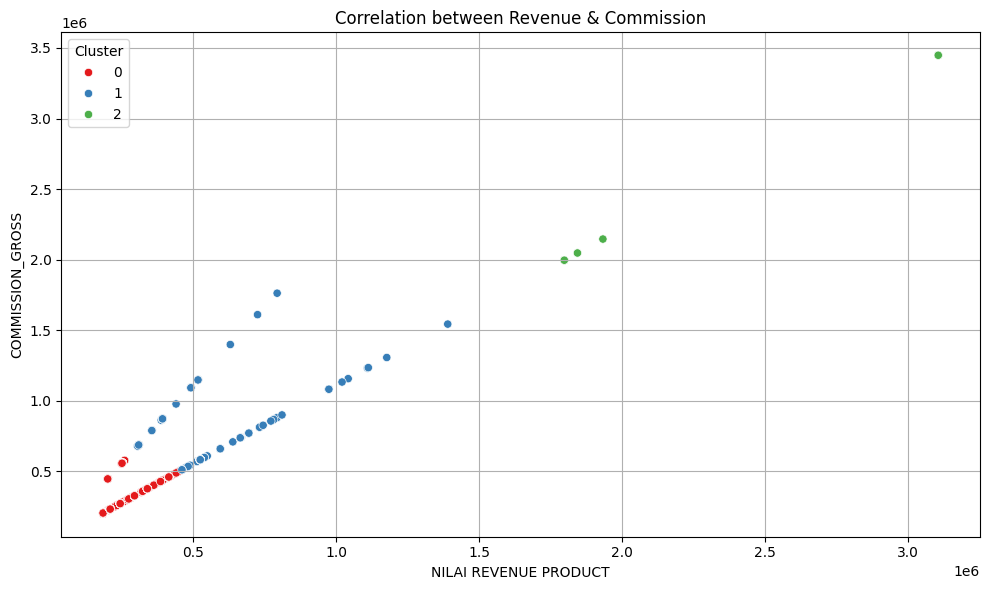

In [12]:
# Plot with cluster colors
plt.figure(figsize=(10,6))
sns.scatterplot(data=flt, x='NILAI REVENUE PRODUCT', y='COMMISSION_GROSS', hue='cluster', palette='Set1')
plt.title('Correlation between Revenue & Commission')
plt.xlabel('NILAI REVENUE PRODUCT')
plt.ylabel('COMMISSION_GROSS')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()
